In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from zNet import zukNet

### 0. Get Data

https://github.com/sbussmann/kaggle-mnist/blob/master/Code/Convolutional%20Neural%20Network.ipynb

In [2]:
data = (pd.read_csv("data/train.csv")).values
# Shuffle the data
np.random.shuffle(data)

# Split the test/train dataset
m, n = data.shape
test_ratio = 0.25

m_test = int(m * 0.25)
X_test = data[:m_test, 1:] / 255
y_test = data[:m_test, 0]

X_train = data[m_test:, 1:] / 255
y_train = data[m_test:, 0]

### Writing the Net in numpy

In [3]:
znet = zukNet(X_train, y_train)

In [4]:
znet.train(lr=0.1, max_iters=301)

Iteration 0: accuracy=0.116
Iteration 10: accuracy=0.281
Iteration 20: accuracy=0.429
Iteration 30: accuracy=0.504
Iteration 40: accuracy=0.560
Iteration 50: accuracy=0.603
Iteration 60: accuracy=0.639
Iteration 70: accuracy=0.665
Iteration 80: accuracy=0.686
Iteration 90: accuracy=0.704
Iteration 100: accuracy=0.718
Iteration 110: accuracy=0.731
Iteration 120: accuracy=0.742
Iteration 130: accuracy=0.752
Iteration 140: accuracy=0.760
Iteration 150: accuracy=0.769
Iteration 160: accuracy=0.776
Iteration 170: accuracy=0.783
Iteration 180: accuracy=0.788
Iteration 190: accuracy=0.793
Iteration 200: accuracy=0.798
Iteration 210: accuracy=0.803
Iteration 220: accuracy=0.807
Iteration 230: accuracy=0.811
Iteration 240: accuracy=0.814
Iteration 250: accuracy=0.818
Iteration 260: accuracy=0.822
Iteration 270: accuracy=0.825
Iteration 280: accuracy=0.828
Iteration 290: accuracy=0.830
Iteration 300: accuracy=0.832


In [5]:
# turn 1D feature vector into 3D cube
def visualizeSample(vector, predict, label):
    npixels = len(vector)
    nx = int(np.sqrt(npixels))
    image = np.zeros((nx, nx))
    for i in range(nx):
        for j in range(nx):
            image[j, i] = vector[j * nx + i]
            
    plt.title(f"predict={predict}; label={label}")
    plt.imshow(image)


(16,) (10,)


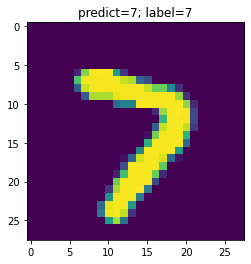

In [6]:
i = 2
visualizeSample(X_test[i], znet.predict_single(X_test[i]), y_test[i])

### Test

In [7]:
znet.analyze_test(X_test, y_test)

0.8274285714285714